In [203]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib import animation

In [280]:
# Import psi^2 functions for different values of T
psi1 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/psi_evolutionT1.csv', delimiter=',')
psi5 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/psi_evolutionT5.csv', delimiter=',')
psi10 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/psi_evolutionT10.csv', delimiter=',')
psi20 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/psi_evolutionT20.csv', delimiter=',')

In [266]:
# Import corresponding potentials
V1 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/V_evolutionT1.csv', delimiter=',')
V5 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/V_evolutionT5.csv', delimiter=',')
V10 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/V_evolutionT10.csv', delimiter=',')
V20 = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex05_marcomini/V_evolutionT20.csv', delimiter=',')

In [267]:
# Copy code params to plot
Lx = 10
N = 2048
dx = 2*Lx/N
X = [ii*dx-Lx+dx/2 for ii in np.arange(N)]

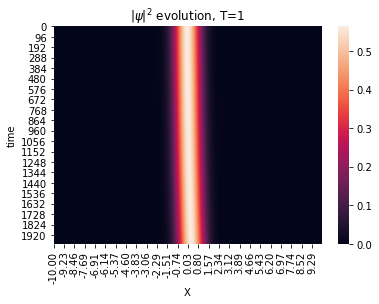

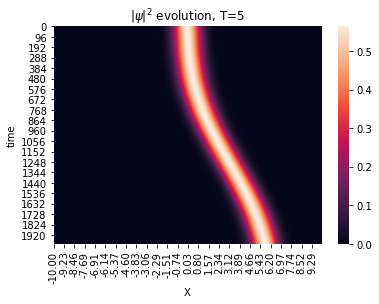

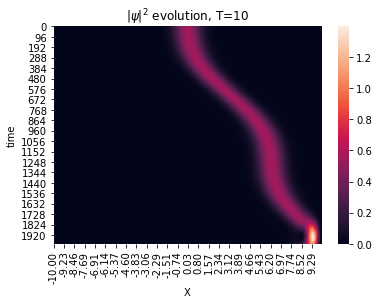

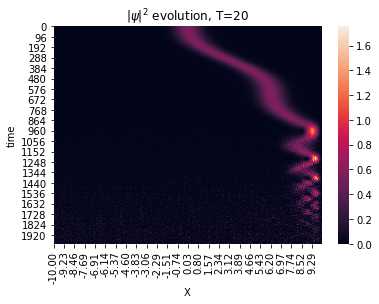

In [276]:
# Create cmaps to visualize psi^2 paths
psis = [psi1,psi5,psi10,psi20]
Ts = [1,5,10,20]
for idx in np.arange(4):
    ax = plt.axes()
    sns.heatmap(psis[idx], ax = ax)
    ax.set_title('$|\psi|^2$ evolution, T='+str(Ts[idx]))
    ax.set_xlabel('X')
    ax.set_ylabel('time')
    labels = np.array([int(item.get_text()) for item in ax.get_xticklabels()])
    labels = (labels/N)*2*Lx - Lx
    labels = ["{:0.2f}".format(x) for x in labels]
    ax.set_xticklabels(labels)
    plt.savefig('Cmap'+str(Ts[idx])+'.png', bbox_inches='tight', dpi=150)
    plt.show()

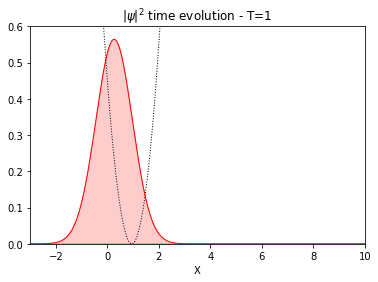

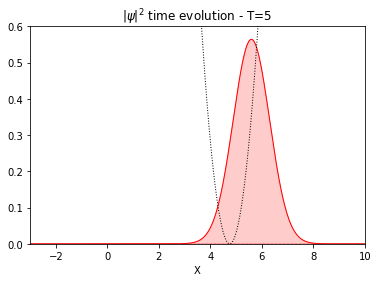

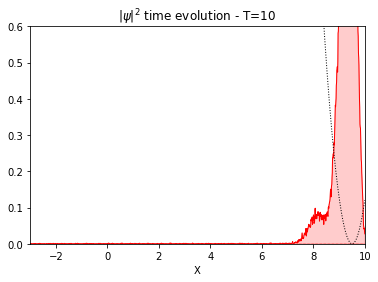

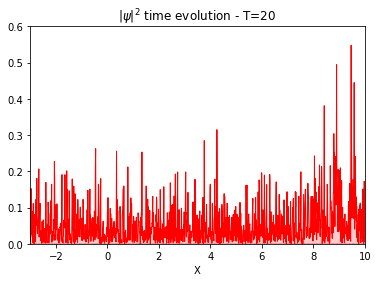

In [283]:
# Save GIF figures to present results
psis = [psi1,psi5,psi10,psi20]
Vs = [V1,V5,V10,V20]
Ts = [1,5,10,20]
for idx in np.arange(4):

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')

    psi = psis[idx]
    V = Vs[idx]

    t = np.arange(20)*100
    psi = psi[t]
    V=V[2*t]

    def update_psi(k):
        ax.clear()
        plt.plot(X,psi[k,:], lw = 1, color = 'r')
        plt.plot(X,V[k,:], lw = 1, color = '0', ls=':')
        plt.plot(X,np.zeros(len(psi[0])), lw = 0.5, ls = ':', color ='r')
        plt.fill_between(X, 0, psi[k,:], color='r', alpha=0.2)
        plt.title('$|\psi|^2$ time evolution - T='+str(Ts[idx]))
        plt.xlabel('X')
        plt.ylim([0,0.6])
        plt.xlim([-3,10])

    num_frames = len(psi)        
    anim = animation.FuncAnimation(fig, update_psi, frames = num_frames)
    anim.save('psi_evT'+str(Ts[idx])+'.gif')

In [253]:
# Plot some frames of the GIF
# for k in np.arange(0,10)*100:
#     plt.plot(X,psi[k,:], lw = 1, color = 'r')
#     plt.plot(X,np.zeros(len(psi[0])), lw = 0.5, ls = ':', color ='r')
#     plt.fill_between(X, 0, psi[k,:], color='r', alpha=0.2)
#     plt.show()

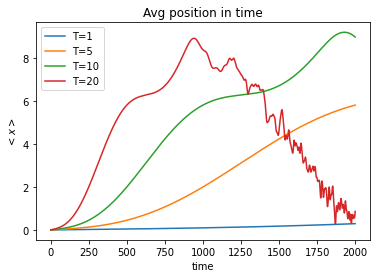

In [277]:
# Calculate and plot avg particle position versus time
X_rep = [X for i in range(len(psi1))]
avg_x1 = np.sum(X_rep*psi1, axis = 1)*dx
avg_x5 = np.sum(X_rep*psi5, axis = 1)*dx
avg_x10 = np.sum(X_rep*psi10, axis = 1)*dx
avg_x20 = np.sum(X_rep*psi20, axis = 1)*dx

plt.plot(avg_x1, label='T=1')
plt.plot(avg_x5, label='T=5')
plt.plot(avg_x10, label='T=10')
plt.plot(avg_x20, label='T=20')
plt.legend()
plt.title('Avg position in time')
plt.xlabel('time')
plt.ylabel('$<x>$')
plt.savefig('AvgX.png', bbox_inches='tight', dpi=150)
plt.show()
